In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
#Import Data
df = pd.read_csv("listings.csv")

In [4]:
df.head()

,id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,15965441,José,11/14/16,within an hour,83%,0%,f,3.0,t,t,...,$150.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN
1,47908784,Raquel,7/15/16,within a day,50%,100%,f,1.0,t,f,...,$450.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN
2,52239613,Fabio,9/13/21,within a day,100%,89%,f,0.0,t,f,...,$350.00,5.00,5.00,5.00,4.89,4.78,4.78,4.89,f,1.16
3,10445855,Márcio,1/24/12,within an hour,100%,100%,f,2.0,t,t,...,$145.00,4.78,4.91,4.89,4.93,4.87,4.70,4.57,f,0.64
4,5.65E+17,Júlio,12/07/14,within an hour,100%,67%,f,0.0,t,t,...,$180.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN


In [5]:
#understanding the dataset columns and redefuining values as well as types based on requirements
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24886 entries, 0 to 24885
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           24885 non-null  object 
 1   host_name                    24765 non-null  object 
 2   host_since                   24765 non-null  object 
 3   host_response_time           19664 non-null  object 
 4   host_response_rate           19664 non-null  object 
 5   host_acceptance_rate         20072 non-null  object 
 6   host_is_superhost            24764 non-null  object 
 7   host_total_listings_count    24764 non-null  float64
 8   host_has_profile_pic         24764 non-null  object 
 9   host_identity_verified       24764 non-null  object 
 10  neighbourhood_cleansed       24881 non-null  object 
 11  latitude                     24881 non-null  float64
 12  longitude                    24881 non-null  float64
 13  property_type   

In [6]:
df['bathrooms_text'].value_counts()

1 bath               10488
2 baths               4937
1 shared bath         1890
1 private bath        1469
3 baths               1418
1.5 baths             1327
2.5 baths              938
2 shared baths         441
3.5 baths              365
1.5 shared baths       327
4 baths                318
4.5 baths              151
5 baths                113
6 baths                 86
5.5 baths               84
3 shared baths          81
2.5 shared baths        63
7 baths                 48
8 baths                 38
6.5 baths               35
0 baths                 34
0 shared baths          29
7.5 baths               24
4 shared baths          23
5 shared baths          16
Shared half-bath        15
3.5 shared baths        12
Half-bath               11
11 baths                 6
8.5 baths                5
6 shared baths           5
10 baths                 4
7 shared baths           4
6.5 shared baths         3
Private half-bath        3
11.5 baths               2
15 baths                 2
9

In [7]:
#Changing Price to float values
df['price']=df['price'].replace('[\$\,]', '', regex=True).astype(float)

#setting all NaN values to 0 for column - 'reviews_per_month'
df.fillna({'reviews_per_month':0, 'accommodates':0,'beds':0,'bedrooms':0 }, inplace=True)

df['beds'] =df['beds'].astype(int)
df['bedrooms'] =df['bedrooms'].astype(int)
df['accommodates'] =df['accommodates'].astype(int)
df.info()

#replace other numeric columns with mean values / Imputing Mean values for other review columns
impute_df = df[['review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value']]
impute_df = impute_df.fillna(impute_df.mean())
df.update(impute_df)

#updating 
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24886 entries, 0 to 24885
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           24885 non-null  object 
 1   host_name                    24765 non-null  object 
 2   host_since                   24765 non-null  object 
 3   host_response_time           19664 non-null  object 
 4   host_response_rate           19664 non-null  object 
 5   host_acceptance_rate         20072 non-null  object 
 6   host_is_superhost            24764 non-null  object 
 7   host_total_listings_count    24764 non-null  float64
 8   host_has_profile_pic         24764 non-null  object 
 9   host_identity_verified       24764 non-null  object 
 10  neighbourhood_cleansed       24881 non-null  object 
 11  latitude                     24881 non-null  float64
 12  longitude                    24881 non-null  float64
 13  property_type   

,id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,15965441,José,11/14/16,within an hour,83%,0%,f,3.0,t,t,...,150.0,4.678449,4.787037,4.699627,4.874502,4.854086,4.856884,4.666319,f,0.00
1,47908784,Raquel,7/15/16,within a day,50%,100%,f,1.0,t,f,...,450.0,4.678449,4.787037,4.699627,4.874502,4.854086,4.856884,4.666319,f,0.00
2,52239613,Fabio,9/13/21,within a day,100%,89%,f,0.0,t,f,...,350.0,5.000000,5.000000,5.000000,4.890000,4.780000,4.780000,4.890000,f,1.16
3,10445855,Márcio,1/24/12,within an hour,100%,100%,f,2.0,t,t,...,145.0,4.780000,4.910000,4.890000,4.930000,4.870000,4.700000,4.570000,f,0.64
4,5.65E+17,Júlio,12/07/14,within an hour,100%,67%,f,0.0,t,t,...,180.0,4.678449,4.787037,4.699627,4.874502,4.854086,4.856884,4.666319,f,0.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24886 entries, 0 to 24885
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           24885 non-null  object 
 1   host_name                    24765 non-null  object 
 2   host_since                   24765 non-null  object 
 3   host_response_time           19664 non-null  object 
 4   host_response_rate           19664 non-null  object 
 5   host_acceptance_rate         20072 non-null  object 
 6   host_is_superhost            24764 non-null  object 
 7   host_total_listings_count    24764 non-null  float64
 8   host_has_profile_pic         24764 non-null  object 
 9   host_identity_verified       24764 non-null  object 
 10  neighbourhood_cleansed       24881 non-null  object 
 11  latitude                     24881 non-null  float64
 12  longitude                    24881 non-null  float64
 13  property_type   

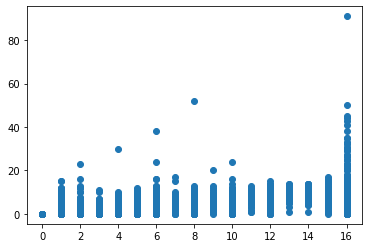

In [8]:
plt.scatter(x=df['accommodates'], y=df['beds'])
plt.show()

In [9]:
#removing unwanted columns for problem statement 1 : Larger properties should receive more review as per accomodation
#columns defining larger property are filtered
df1 = df[['property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'price','review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value','instant_bookable',
       'reviews_per_month']]
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24886 entries, 0 to 24885
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   property_type                24881 non-null  object 
 1   room_type                    24881 non-null  object 
 2   accommodates                 24886 non-null  int64  
 3   bathrooms_text               24828 non-null  object 
 4   bedrooms                     24886 non-null  int64  
 5   beds                         24886 non-null  int64  
 6   price                        24880 non-null  float64
 7   review_scores_rating         24886 non-null  float64
 8   review_scores_accuracy       24886 non-null  float64
 9   review_scores_cleanliness    24886 non-null  float64
 10  review_scores_checkin        24886 non-null  float64
 11  review_scores_communication  24886 non-null  float64
 12  review_scores_location       24886 non-null  float64
 13  review_scores_va

,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,Private room in rental unit,Private room,2,1 bath,1,1,150.0,4.678449,4.787037,4.699627,4.874502,4.854086,4.856884,4.666319,f,0.00
1,Entire condo,Entire home/apt,4,2 baths,2,2,450.0,4.678449,4.787037,4.699627,4.874502,4.854086,4.856884,4.666319,f,0.00
2,Entire rental unit,Entire home/apt,5,1 bath,2,5,350.0,5.000000,5.000000,5.000000,4.890000,4.780000,4.780000,4.890000,f,1.16
3,Entire home,Entire home/apt,3,1 bath,1,2,145.0,4.780000,4.910000,4.890000,4.930000,4.870000,4.700000,4.570000,f,0.64
4,Private room in bed and breakfast,Private room,4,1.5 baths,2,3,180.0,4.678449,4.787037,4.699627,4.874502,4.854086,4.856884,4.666319,f,0.00


In [10]:
#Categorical columns - "property_type" "room_type" "bathrooms_text" changing to One Hot encoding + get_dummies for these 
df1 = df1.replace(to_replace = {"6/21/22", 'nan'}, value ="Entire home/apt")
df1['room_type'] =df1['room_type'].astype(str)
df1['room_type'].value_counts() 
df1['property_type'].value_counts()
df1['accommodates'].value_counts()

df1.apply(lambda col: len(col.unique()))
col = ["room_type"] 
df_room_type = pd.get_dummies(df1, columns = col, drop_first=False)

col=["property_type"]
df_property_type = pd.get_dummies(df1, columns = col, drop_first=False)


df_room_type.head()
df1.info()
df_room_type.info()

Entire home/apt    19134
Private room        5230
Shared room          450
Hotel room            67
nan                    5
Name: room_type, dtype: int64

Entire rental unit             14315
Private room in rental unit     3043
Entire condo                    1707
Entire home                     1139
Private room in home             974
                               ...  
364                                1
Shared room in nature lodge        1
Yurt                               1
Shared room in cottage             1
Room in nature lodge               1
Name: property_type, Length: 84, dtype: int64

4     6948
2     6361
6     3090
3     2720
5     1942
1     1157
8      924
7      535
10     465
12     195
16     182
9      158
14      69
15      54
13      37
11      36
0       13
Name: accommodates, dtype: int64

property_type                    85
room_type                         5
accommodates                     17
bathrooms_text                   50
bedrooms                         19
beds                             41
price                          1664
review_scores_rating            136
review_scores_accuracy          127
review_scores_cleanliness       164
review_scores_checkin           116
review_scores_communication     125
review_scores_location          122
review_scores_value             142
instant_bookable                  3
reviews_per_month               569
dtype: int64

,property_type,accommodates,bathrooms_text,bedrooms,beds,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,room_type_nan
0,Private room in rental unit,2,1 bath,1,1,150.0,4.678449,4.787037,4.699627,4.874502,4.854086,4.856884,4.666319,f,0.00,0,0,1,0,0
1,Entire condo,4,2 baths,2,2,450.0,4.678449,4.787037,4.699627,4.874502,4.854086,4.856884,4.666319,f,0.00,1,0,0,0,0
2,Entire rental unit,5,1 bath,2,5,350.0,5.000000,5.000000,5.000000,4.890000,4.780000,4.780000,4.890000,f,1.16,1,0,0,0,0
3,Entire home,3,1 bath,1,2,145.0,4.780000,4.910000,4.890000,4.930000,4.870000,4.700000,4.570000,f,0.64,1,0,0,0,0
4,Private room in bed and breakfast,4,1.5 baths,2,3,180.0,4.678449,4.787037,4.699627,4.874502,4.854086,4.856884,4.666319,f,0.00,0,0,1,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24886 entries, 0 to 24885
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   property_type                24881 non-null  object 
 1   room_type                    24886 non-null  object 
 2   accommodates                 24886 non-null  int64  
 3   bathrooms_text               24828 non-null  object 
 4   bedrooms                     24886 non-null  int64  
 5   beds                         24886 non-null  int64  
 6   price                        24880 non-null  float64
 7   review_scores_rating         24886 non-null  float64
 8   review_scores_accuracy       24886 non-null  float64
 9   review_scores_cleanliness    24886 non-null  float64
 10  review_scores_checkin        24886 non-null  float64
 11  review_scores_communication  24886 non-null  float64
 12  review_scores_location       24886 non-null  float64
 13  review_scores_va

array([[<AxesSubplot:title={'center':'accommodates'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'beds'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'review_scores_rating'}>,
        <AxesSubplot:title={'center':'review_scores_accuracy'}>,
        <AxesSubplot:title={'center':'review_scores_cleanliness'}>,
        <AxesSubplot:title={'center':'review_scores_checkin'}>],
       [<AxesSubplot:title={'center':'review_scores_communication'}>,
        <AxesSubplot:title={'center':'review_scores_location'}>,
        <AxesSubplot:title={'center':'review_scores_value'}>,
        <AxesSubplot:title={'center':'reviews_per_month'}>],
       [<AxesSubplot:title={'center':'room_type_Entire home/apt'}>,
        <AxesSubplot:title={'center':'room_type_Hotel room'}>,
        <AxesSubplot:title={'center':'room_type_Private room'}>,
        <AxesSubplot:title={'center':'room_type_Shared room'}>],
       [<AxesSubpl

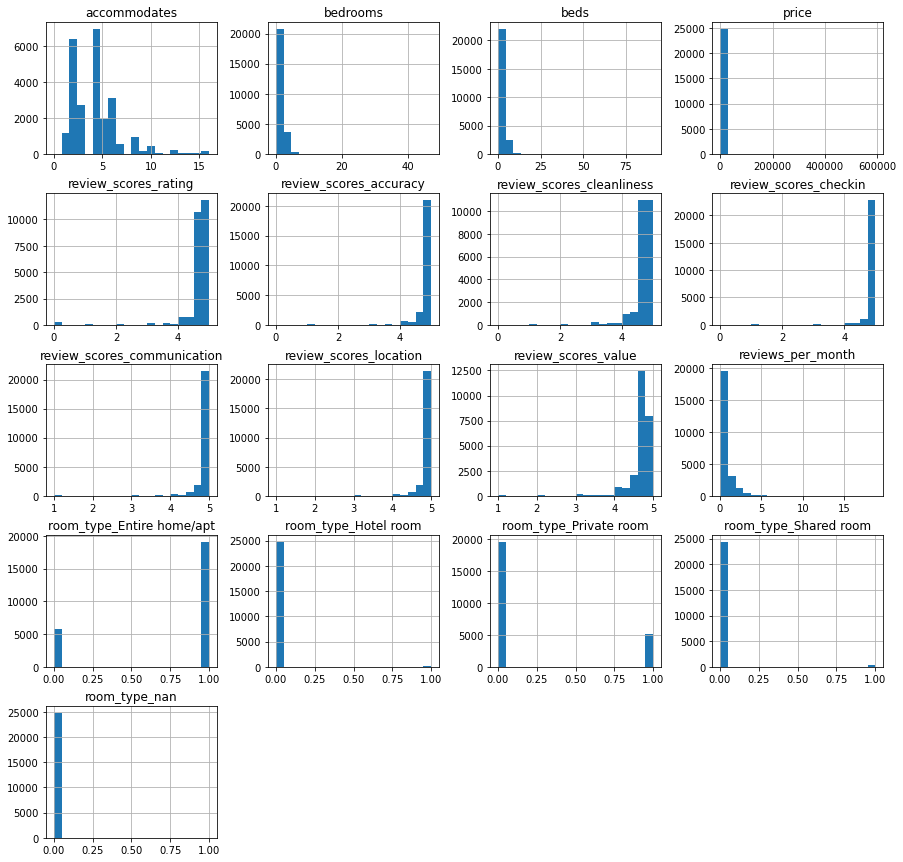

In [11]:
#converting property_type and room_type to specific encoding and then get dummies to add for correlation 
#"property_type" "room_type" "bathroom_text" 
df_room_type.hist(bins=20, figsize=(15,15))
plt.show()

<AxesSubplot:title={'center':'Roomtype vs accomodation capacity'}, xlabel='Room types', ylabel='Accomodations'>

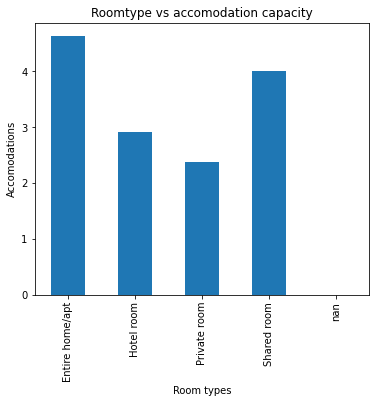

In [12]:
g = df1.groupby(['room_type'])['accommodates'].mean()
g.plot(kind='bar', title='Roomtype vs accomodation capacity', ylabel='Accomodations',
         xlabel='Room types', figsize=(6, 5))

<AxesSubplot:title={'center':'Room type vs Reviews per month'}, xlabel='Room types', ylabel='Reviews per momth'>

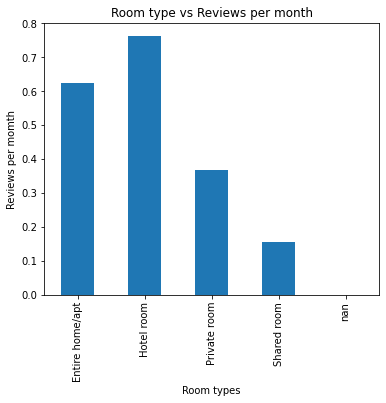

In [13]:
g = df1.groupby(['room_type'])['reviews_per_month'].mean()
g.plot(kind='bar', title='Room type vs Reviews per month', ylabel='Reviews per momth',
         xlabel='Room types', figsize=(6, 5))

<AxesSubplot:title={'center':'Property accomodation'}, xlabel='Room Types', ylabel='Prices'>

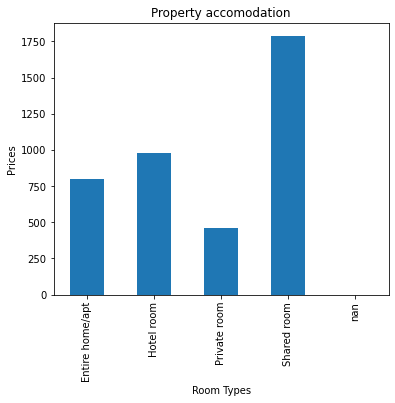

In [14]:
g = df1.groupby(['room_type'])['price'].mean()
g.plot(kind='bar', title='Property accomodation', ylabel='Prices',
         xlabel='Room Types', figsize=(6, 5))

<AxesSubplot:>

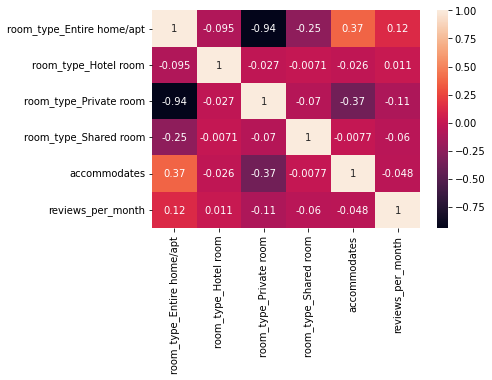

In [15]:
corr = df_room_type[['room_type_Entire home/apt','room_type_Hotel room','room_type_Private room','room_type_Shared room','accommodates','reviews_per_month']].corr()
sns.heatmap(corr, annot=True)
plt.show()

<AxesSubplot:title={'center':'Property accomodation'}, xlabel='Property types', ylabel='Accomodations'>

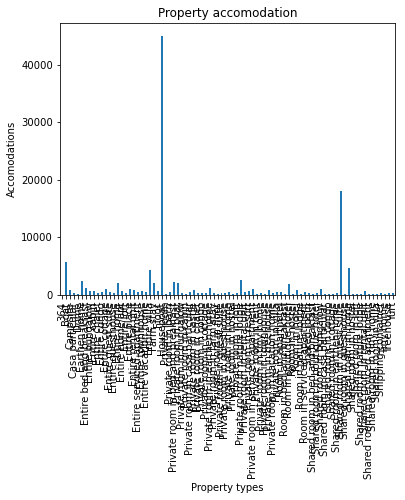

In [16]:
g = df1.groupby(['property_type'])['price'].mean()
g.plot(kind='bar', title='Property accomodation', ylabel='Accomodations',
         xlabel='Property types', figsize=(6, 5))

<AxesSubplot:xlabel='accommodates', ylabel='price'>

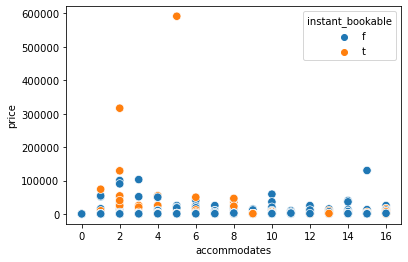

In [17]:
sns.scatterplot(x=df1.accommodates, y=df1.price, hue=df1.instant_bookable,s=70)

# corr_matrix =df1.corr()
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(corr_matrix, annot=True)
plt.show()
#df1['property_type'].value_counts()


#df1.plot(x='property_type', y = 'accommodates', kind='scatter')
#df.groupby(['property_type']).size().unstack(fill_value=0‌​).plot.bar()
#pd.crosstab(df['property_type'],df['accommodates']).plot.bar()
#plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24886 entries, 0 to 24885
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   property_type                24881 non-null  object 
 1   room_type                    24886 non-null  object 
 2   accommodates                 24886 non-null  int64  
 3   bathrooms_text               24828 non-null  object 
 4   bedrooms                     24886 non-null  int64  
 5   beds                         24886 non-null  int64  
 6   price                        24880 non-null  float64
 7   review_scores_rating         24886 non-null  float64
 8   review_scores_accuracy       24886 non-null  float64
 9   review_scores_cleanliness    24886 non-null  float64
 10  review_scores_checkin        24886 non-null  float64
 11  review_scores_communication  24886 non-null  float64
 12  review_scores_location       24886 non-null  float64
 13  review_scores_va

<AxesSubplot:ylabel='Frequency'>

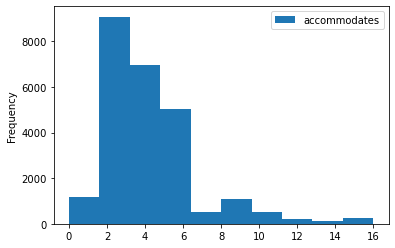

In [18]:
#df1.plot(x='accommodates', y =['property_type', 'room_type'], kind='scatter')
df1.info()
#df1['accommodates']= df1['accommodates'].astype(int)

df1.plot(x='room_type', y='accommodates', kind='hist')
plt.show()

<AxesSubplot:xlabel='beds', ylabel='reviews_per_month'>

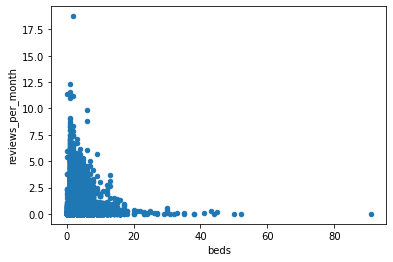

In [19]:
df1.plot(x='beds', y = 'reviews_per_month', kind='scatter')
plt.show()

<AxesSubplot:xlabel='bedrooms', ylabel='reviews_per_month'>

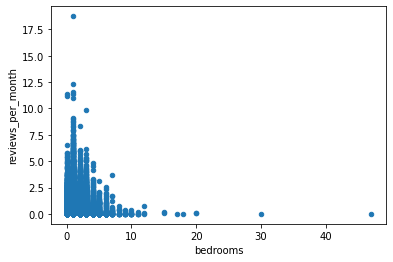

In [20]:
df1.plot(x='bedrooms', y = 'reviews_per_month', kind='scatter', legend=True)
plt.show()

<AxesSubplot:ylabel='Frequency'>

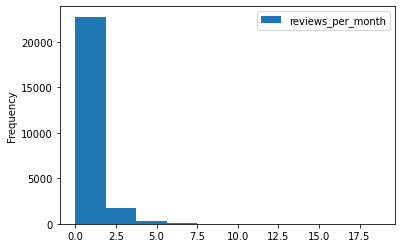

,id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,15965441,José,11/14/16,within an hour,83%,0%,f,3.0,t,t,...,150.0,4.678449,4.787037,4.699627,4.874502,4.854086,4.856884,4.666319,f,0.00
1,47908784,Raquel,7/15/16,within a day,50%,100%,f,1.0,t,f,...,450.0,4.678449,4.787037,4.699627,4.874502,4.854086,4.856884,4.666319,f,0.00
2,52239613,Fabio,9/13/21,within a day,100%,89%,f,0.0,t,f,...,350.0,5.000000,5.000000,5.000000,4.890000,4.780000,4.780000,4.890000,f,1.16
3,10445855,Márcio,1/24/12,within an hour,100%,100%,f,2.0,t,t,...,145.0,4.780000,4.910000,4.890000,4.930000,4.870000,4.700000,4.570000,f,0.64
4,5.65E+17,Júlio,12/07/14,within an hour,100%,67%,f,0.0,t,t,...,180.0,4.678449,4.787037,4.699627,4.874502,4.854086,4.856884,4.666319,f,0.00


room_type
6/21/22            AxesSubplot(0.125,0.125;0.775x0.755)
Entire home/apt    AxesSubplot(0.125,0.125;0.775x0.755)
Hotel room         AxesSubplot(0.125,0.125;0.775x0.755)
Private room       AxesSubplot(0.125,0.125;0.775x0.755)
Shared room        AxesSubplot(0.125,0.125;0.775x0.755)
Name: reviews_per_month, dtype: object

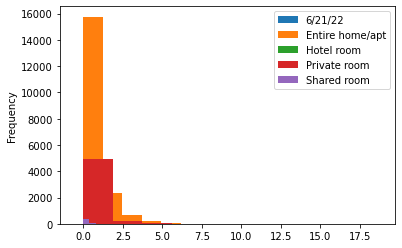

In [21]:
df.plot(x='room_type', y = 'reviews_per_month', kind='hist')
plt.show()

df.head()
#define index column
df.set_index('accommodates', inplace=True)

#group data by product and display sales as line chart
df.groupby('room_type')['reviews_per_month'].plot(kind = 'hist', legend=True)

In [22]:
df['room_type'].value_counts()

Entire home/apt    19133
Private room        5230
Shared room          450
Hotel room            67
6/21/22                1
Name: room_type, dtype: int64

In [23]:
import statsmodels.api as sm

logit_mod = sm.Logit(df2['default payment next month'], sm.add_constant((df2.drop('default payment next month', axis = 1))))
logit_res = logit_mod.fit()
print(logit_res.summary())

NameError: name 'df2' is not defined